In [1]:
# Kernel Python (Pyodide)
#import and patch libraries for web use
import pyodide_http
pyodide_http.patch_all

# packages with micropip
import micropip
await micropip.install("openpyxl")

#import pandas
import pandas as pd
#matplotlib library for plotting
import matplotlib.pyplot as plt
#the statsmodels libraty for statistical modeling
import statsmodels.api as sm

# file with data
excel_file = pd.ExcelFile("techgear_sales_data.xlsx", engine='openpyxl')

data = pd.read_excel(excel_file)

# (Q1) DATA EXPLORATION AND SUMMARY
#print the DataFrame to display the data
print(f'{data.head()}\n')

num_row = len(data)
print(f'Number of rows: {num_row}')
num_col = len(data.columns)
print(f'Number of columns: {num_col}\n')
average_spent_facebook = data['Ad_Spend_Facebook'].mean()
average_spent_instagram = data['Ad_Spend_Instagram'].mean()
average_discount = data['Discount_Rate'].mean()
print(f'The average amount spent on advertising for Facebook platform: ${average_spent_facebook:.2f}')
print(f'The average amount spent on advertising for Instagram platform: ${average_spent_instagram:.2f}')
print(f'The average discount provided to customers: {average_discount:.2f}%')

Matplotlib is building the font cache; this may take a moment.


        Date  Sales  Ad_Spend_Facebook  Ad_Spend_Instagram  Discount_Rate
0 2020-01-31   4283                340                 146             10
1 2020-02-29   4775                284                 200              6
2 2020-03-31   5437                290                 240             10
3 2020-04-30   4541                269                 193             10
4 2020-05-31   3161                218                 182             16

Number of rows: 60
Number of columns: 5

The average amount spent on advertising for Facebook platform: $297.27
The average amount spent on advertising for Instagram platform: $192.53
The average discount provided to customers: 12.38%


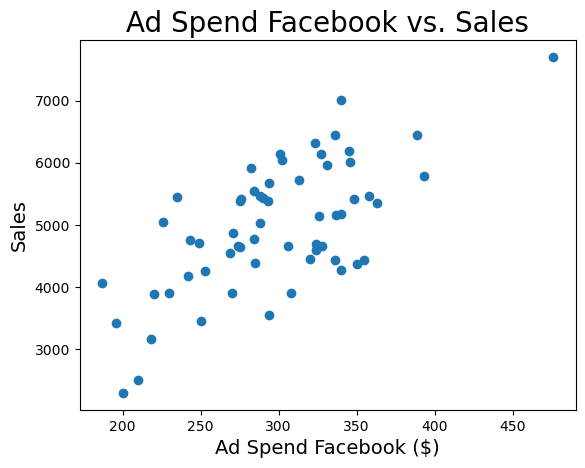

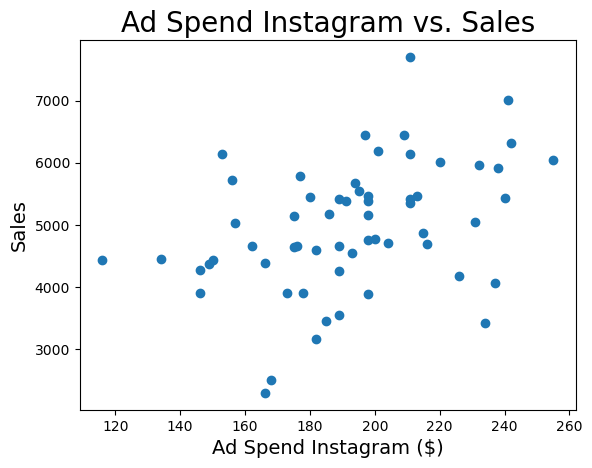

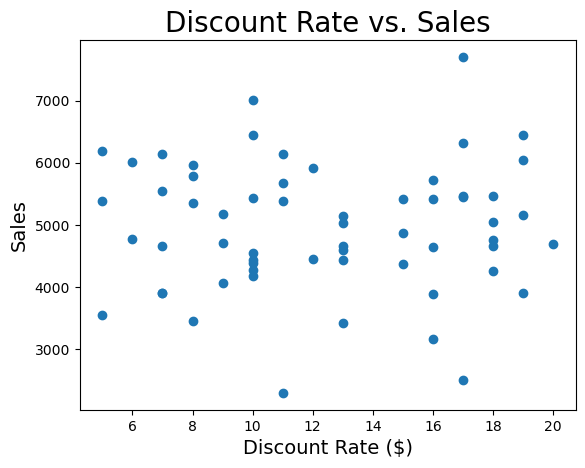

In [2]:
# (Q2) VISUALIZING RELATIONSHIPS

# A scatter plot with Ad_Spend_Facebook on the x-axis and Sales on the y-axis
plt.scatter(data['Ad_Spend_Facebook'], data['Sales'])
# Label the x-axis as "Ad Spend Facebook"
plt.xlabel('Ad Spend Facebook ($)', fontsize='14')
# Label the y-axis as "Sales ($)"
plt.ylabel('Sales', fontsize='14')
# Set the title of the plot to 'Ad Spend Facebook vs. Sales'
plt.title('Ad Spend Facebook vs. Sales', fontsize='20')
# Display the plot
plt.show()

# A scatter plot with Ad_Spend_Instagram on the x-axis and Sales on the y-axis
plt.scatter(data['Ad_Spend_Instagram'], data['Sales'])
# Label the x-axis as "Ad Spend Instagram"
plt.xlabel('Ad Spend Instagram ($)', fontsize='14')
# Label the y-axis as "Sales ($)"
plt.ylabel('Sales', fontsize='14')
# Set the title of the plot to 'Ad Spend Instagram vs. Sales'
plt.title('Ad Spend Instagram vs. Sales', fontsize='20')
# Display the plot
plt.show()

# A scatter plot with Discount Rate on the x-axis and Sales on the y-axis
plt.scatter(data['Discount_Rate'], data['Sales'])
# Label the x-axis as "Discount Rate"
plt.xlabel('Discount Rate ($)', fontsize='14')
# Label the y-axis as "Sales ($)"
plt.ylabel('Sales', fontsize='14')
# Set the title of the plot to 'Discount Rate vs. Sales'
plt.title('Discount Rate vs. Sales', fontsize='20')
# Display the plot
plt.show()

In [3]:
# (Q3) SIMPLE LINEAR REGRESSION

#define the response (Y) and explanatory (X) variables
x = data['Ad_Spend_Facebook']
y = data['Sales']

#add a constant to the explanatory variable
x = sm.add_constant(x)

#build the linear regression model using the Ordinary Least Squares (OLS) method.
model = sm.OLS(y, x).fit()

#print the coefficients of the model and R-squared output
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     47.61
Date:                Fri, 14 Nov 2025   Prob (F-statistic):           4.32e-09
Time:                        08:35:45   Log-Likelihood:                -482.94
No. Observations:                  60   AIC:                             969.9
Df Residuals:                      58   BIC:                             974.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1141.2817    563.05

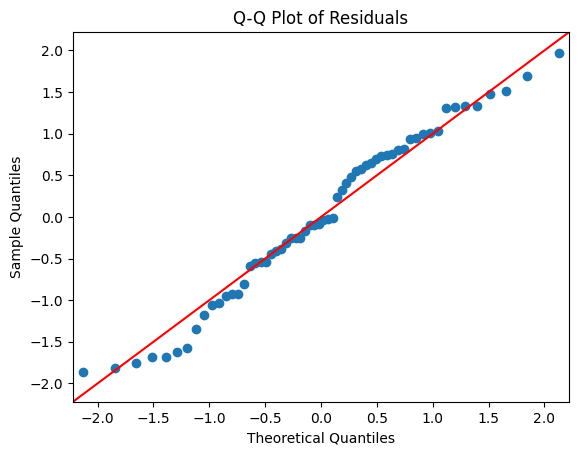

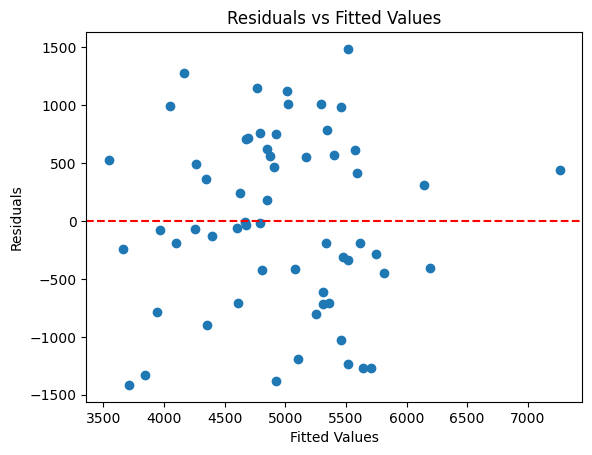

In [4]:
# (Q4) ASSESSING MODEL FIT
# obtain the residual from the model
# residual - difference between the observed value and the predicted value
residuals = model.resid
# extract the fitted value (predicted values) from the model
fitted_values = model.fittedvalues

# print the residual
#print(residuals)
# Create a Q-Q plot of the residuals with a 45-degree reference line
sm.qqplot(residuals, line='45', fit=True)
# Add a title to the Q-Q plot
plt.title('Q-Q Plot of Residuals')
# Display the Q-Q plot
plt.show()

# extract the fitted values (predicted values)
fitted_values = model.fittedvalues

# Create Residual vs. Fitted Values plot
# Create a scatter plot of the fitted values against the residuals
plt.scatter (fitted_values, residuals)
# Add a horizontal reference line at y=0 (red dashes line)
plt.axhline (y=0, color='r', linestyle='--')
# Label the x-axis as 'Fitted Values'
plt.xlabel('Fitted Values')
# Label the y-axis as 'Residuals'
plt.ylabel('Residuals')
# Add a title to the plot
plt.title('Residuals vs Fitted Values')
plt.show()

In [5]:
# (Q5) MULTIPLE LINEAR REGRESSION

# Define response ans explonatory variables
x = data[['Ad_Spend_Facebook', 'Ad_Spend_Instagram', 'Discount_Rate']]
y = data['Sales']

# add a constant to the explonatory variable
x = sm.add_constant(x)

# build the multiple linear regression model
model = sm.OLS(y, x).fit()

# print patameter estimates/coefficent of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     34.60
Date:                Fri, 14 Nov 2025   Prob (F-statistic):           8.74e-13
Time:                        08:35:45   Log-Likelihood:                -469.46
No. Observations:                  60   AIC:                             946.9
Df Residuals:                      56   BIC:                             955.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1944.9593    747

In [20]:
# (Q6) FORECASTING
# file with data
excel_file_monthly = pd.ExcelFile("techgear_sales_data_monthly.xlsx", engine='openpyxl')

data_monthly = pd.read_excel(excel_file_monthly)

# Calculate 3 months sales
data_monthly['MA_3'] = data_monthly['Sales'].rolling(window=3).mean()

# View the forecasts
print(data_monthly.head(n=10))

# forecast using 3 month moving average
forecast_3 = data_monthly['MA_3'].dropna().iloc[-1]

# Print the 3 month moving averages for January 2025
print(f'Forecast for January 2025: {forecast_3:.0f}')

# Remove any missing values from the data frame.
# prepare the data for the forecast accuracy measures calculations
# remove the missing values from the data frame so that MSE, MAE, and MAPE
# can be calculated.
data_monthly.dropna(inplace=True)
# Calculate and print the MSE for 3-month MA
mse_3 = ((data_monthly['Sales'] - data_monthly['MA_3'])** 2).mean()
print(f"The Mean Square Error (MSE) for 3-month MA is: {mse_3: .1f}")

# Calculate and print the MAE for 3-month MA
mae_3 = (data_monthly['Sales'] - data_monthly['MA_3']).abs().mean()
print(f"The Mean Absolute Error (MAE) for 3-month MA is: {mae_3: .1f}")

# Calculate and print the MAPE for 3-month MA
mape_3 = (abs(data_monthly['Sales'] - data_monthly['MA_3']) / data_monthly['Sales']).mean() * 100
print(f"The Mean Absolute Percentage Error (MAPE) for 3-month MA is: {mape_3: .1f}%")

# # Exponential Smoothing

# # View the last observations in the data frame


# Importlibraries and modules
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# Extract the Sales column
data_monthly = pd.read_excel(excel_file_monthly)
print(data_monthly.head())
sales = data_monthly['Sales']
# Create and forecast values using the exponential smoothing model
# with a specified smoothing parameters, alpha es_model
es_model = SimpleExpSmoothing(sales).fit(smoothing_level=0.8)
# Print the forecasted/fitted values
print(es_model.fittedvalues)

        Date   Sales  Ad_Spend_Facebook  Ad_Spend_Instagram  Discount_Rate  \
0 2020-01-31  5972.0             6418.0             10277.0           10.0   
1 2020-02-29  6054.0             3443.0              3110.0            6.0   
2 2020-03-31  5911.0            10315.0              4218.0           10.0   
3 2020-04-30  6022.0             9032.0             10962.0           10.0   
4 2020-05-31  6085.0             3618.0              3061.0           16.0   
5 2020-06-30  5920.0             6344.0              4930.0           15.0   
6 2020-07-31  5955.0            13899.0              9585.0           18.0   
7 2020-08-31  5985.0             5875.0             11303.0           12.0   
8 2020-09-30  6025.0             4739.0             10824.0            7.0   
9 2020-10-31  5952.0             8873.0              5691.0           16.0   

          MA_3  
0          NaN  
1          NaN  
2  5979.000000  
3  5995.666667  
4  6006.000000  
5  6009.000000  
6  5986.666667  
7  59

/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


0     5972.000000
1     5972.000000
2     6037.600000
3     5936.320000
4     6004.864000
         ...     
56    6112.481129
57    6025.696226
58    5980.339245
59    6164.067849
60    6032.013570
Length: 61, dtype: float64


Average Root Mean Squared Error from 5-fold Cross-Validation: 626
Average RMSE from Decision Tree: 911
Relationship between the Variables


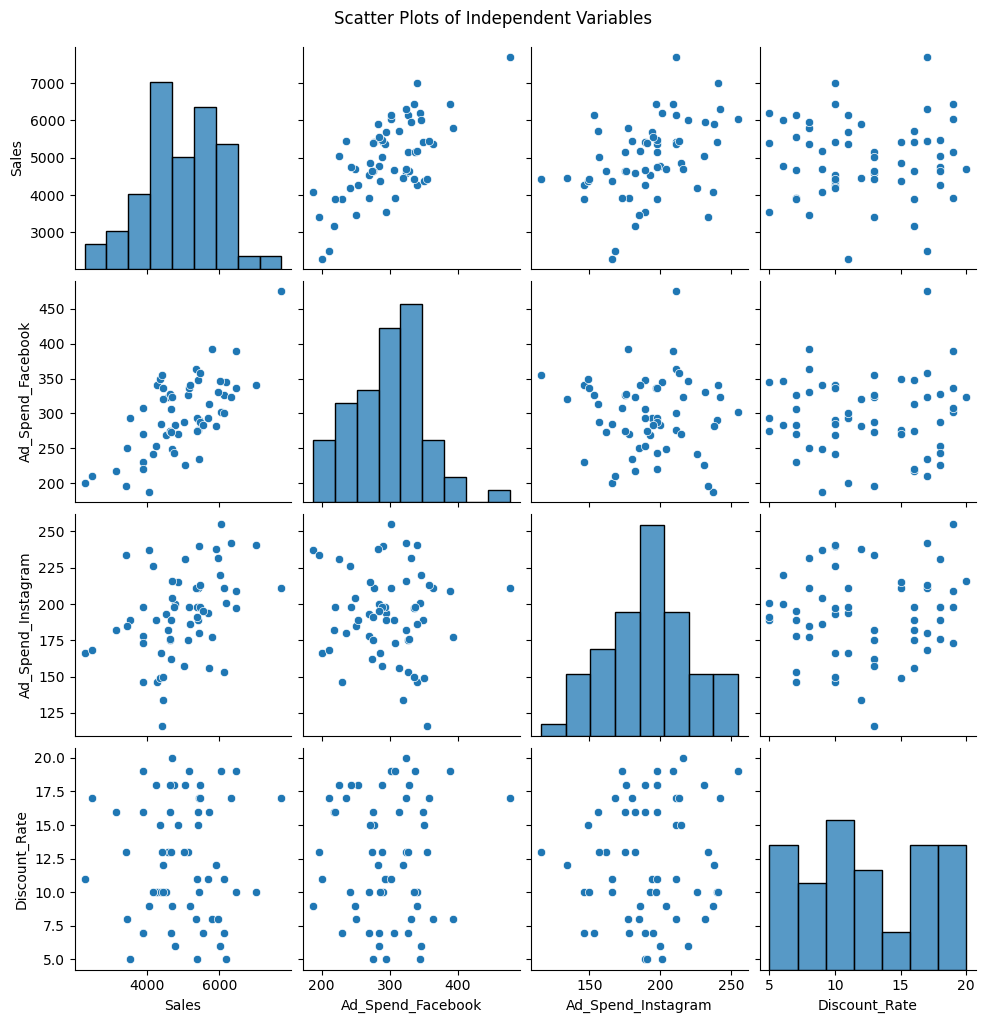

In [7]:
# (Q7) MACHINE LEARNING MODELS 

# Build a multiple linear regression model using k-fold cross-validation and 
# use RMSF as the assessment measure.
# Import the cross_val_score function for performing cross validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.tree import DecisionTreeRegressor
#install and import the seaborn library for data visualization
await micropip.install('seaborn')
import seaborn as sns

# select the features and target variable
features = ['Ad_Spend_Facebook', 'Ad_Spend_Instagram', 'Discount_Rate']
target = 'Sales'
# prepare the future matrix (x) and target vector (y)
x = data[features]
y = data[target]

# initialize the model
model = LinearRegression()
# set a random seed for reproducibility
# shuffling process arranges the data in the same way every time
np.random.seed(42)
# preform 5-fold cross-validation
mse_scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
# calculate the RMSE across all folds
rmse_scores = (-mse_scores) ** 0.5
average_rmse = rmse_scores.mean()
# print the average RMSE
print(f"Average Root Mean Squared Error from 5-fold Cross-Validation: {average_rmse:.0f}")

# Initialize the model
tree_model = DecisionTreeRegressor()

# Cross-validation: 5 folds
tree_mse_scores =  cross_val_score(tree_model, x, y, cv=5, scoring='neg_mean_squared_error')

# Convert MSE to RMSE
tree_rmse_scores = (-tree_mse_scores) ** 0.5

# compute average RMSE for both models
tree_avg_rmse = tree_rmse_scores.mean()

# Print results
print(f'Average RMSE from Decision Tree: {tree_avg_rmse:.0f}')

print("Relationship between the Variables")

# Create scatterplots to visualize relationships between the variables
sns.pairplot(data[['Sales','Ad_Spend_Facebook', 'Ad_Spend_Instagram', 'Discount_Rate']])
# Add a title to the scatterplot matrix
plt.suptitle('Scatter Plots of Independent Variables', y=1.02)

# Displat the Scatter plot matrix
plt.show()